In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import lightgbm
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV, cross_val_score

In [2]:
import xgboost as xgb

# Loading and reading data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Checking the variable names and the first 5 rows of the data frame

In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Checking the information and data types of the variable of the data



In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Understanding the summary statistics of all variables in the data set
1. Most of the variables like occupation, Product categories in the dataset are masked with integers and City_Category is masked with alphabets.
2. Male buyers are more frequent in the dataset than female buyers.
3. Highest number of purchasers had '1 year stay' in the current city
4. Data set has more singles (Marital status 0) than married people (Marital status 1).

In [6]:
train.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


Checking the unique values in each of the variables. User ID and product ID have a lot unique categories and hence can't be used directly in the model. 

In [7]:
train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

Checking the number of null values for each of the variables

In [8]:
train.isnull().sum()/train.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

So, here we can see that Product_Category_2 and Product_Category_3 have high proportion of null values.

# Data Visualization

Exploring the frequency distributions of all the columns.

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>],
       [<AxesSubplot:title={'center':'Product_Category_1'}>,
        <AxesSubplot:title={'center':'Product_Category_2'}>,
        <AxesSubplot:title={'center':'Product_Category_3'}>],
       [<AxesSubplot:title={'center':'Purchase'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

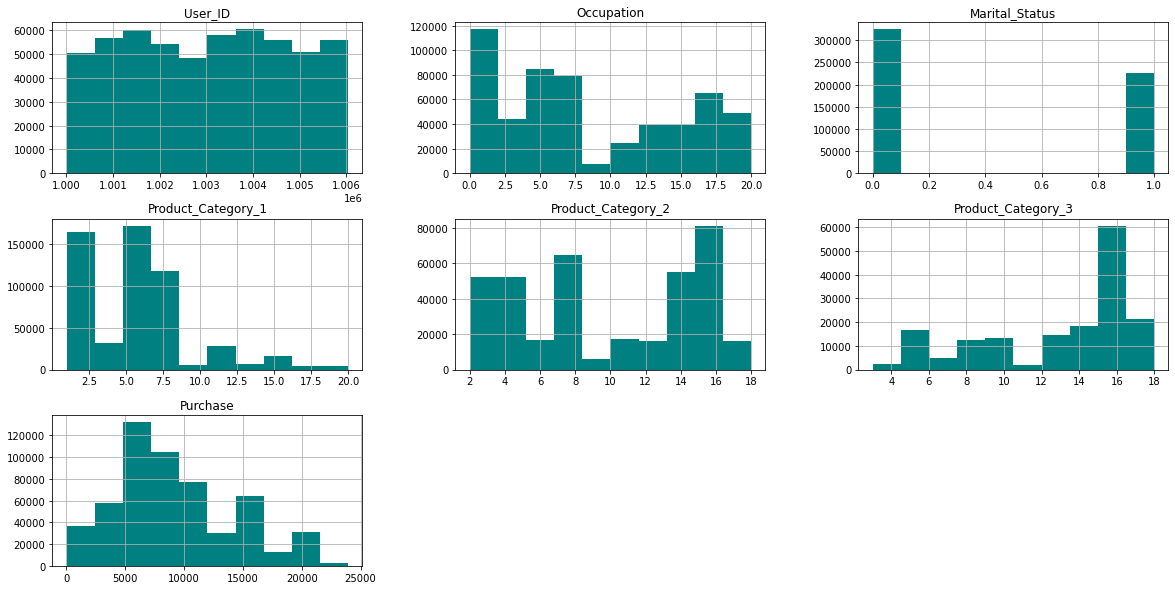

In [9]:
train.hist(figsize=(20,10), color = 'teal')

Average purchase value of single men is slightly higher than married people, while the trend is opposite in case of women !

# Data processing



To trained the model we drop the column 'user_id' and 'product_id'.

In [10]:
train_x = train.drop(columns =['User_ID','Product_ID'],axis=1)


since, Product_Category_3 have high proportion of null values which is almost 70 percent. so it can't 
 give us much information. so we gonna drop Product_Category_3

In [11]:
train_x = train_x.drop(columns =['Product_Category_3'],axis=1)


Now we impute median value in place of  null value in Product_Category_2 

In [13]:

train_x['Product_Category_2'].fillna(0,inplace = True)

In [14]:
train_x= pd.get_dummies(train_x)


I used dummy for label encoding

In [15]:
train_x.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10,0,3,0.0,8370,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,10,0,1,6.0,15200,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,10,0,12,0.0,1422,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,10,0,12,14.0,1057,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,16,0,8,0.0,7969,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1


Checking corelation between columns.

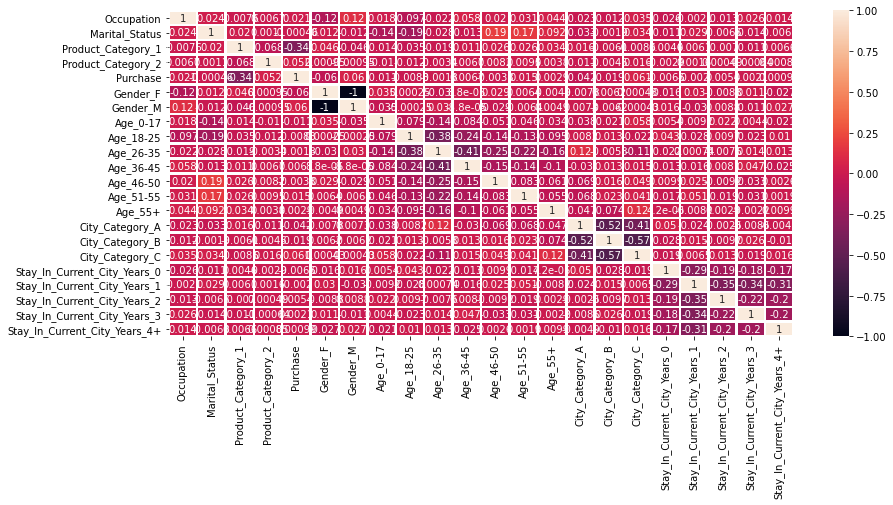

In [16]:
plt.figure(figsize=(14,6))
corr= train_x.corr()
sns.heatmap(corr, linewidths=1.5, annot= True)
plt.show()

Here we can see that corelation between martial_status and purchase value is very very less. so if we remove martial_status column it will not affect accuracy of our model.

In [17]:
train_x = train_x.drop(columns =['Marital_Status'],axis=1)

Splitting data for train and test

In [18]:
 X= train_x.drop(["Purchase"], axis=1)


In [19]:
y= train_x["Purchase"]


# Splitting into train and test set

In [20]:
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)


# Data processing on Test Data

we will process same as we process in  trainining data

In [21]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [23]:
test.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599,233599,233599,233599.000000,233599,233599,233599.000000,233599.000000,161255.000000,71037.000000
unique,NaN,3491,2,7,NaN,3,5,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN
freq,NaN,829,175772,93428,NaN,98566,82604,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.085407,NaN,NaN,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,NaN,NaN,NaN,6.521146,NaN,NaN,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000


In [24]:
test.nunique()

User_ID                       5891
Product_ID                    3491
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1              18
Product_Category_2              17
Product_Category_3              15
dtype: int64

In [25]:
test.isnull().sum()/test.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            30.969311
Product_Category_3            69.590195
dtype: float64

Droping the user_ID and product_ID

In [26]:
test_x = test.drop(columns =['User_ID','Product_ID'],axis=1)

In [27]:
test_x = test_x.drop(columns =['Product_Category_3'],axis=1)


In [28]:
median =test_x['Product_Category_2'].median()
test_x['Product_Category_2'].fillna(median, inplace=True)

In [29]:
test_x= pd.get_dummies(test_x)

In [30]:
test_x = test_x.drop(columns =['Marital_Status'],axis=1)


In [31]:
test_x.head()

,Occupation,Product_Category_1,Product_Category_2,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,7,1,11.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,17,3,5.0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
2,1,5,14.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,1,4,9.0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,1,4,5.0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


# Train, Test, Accuracy

So, now we will use test_x data for prediction

# Converting Data into DMatrix for XGBoost

In [32]:
#For Train Data
dtrain = xgb.DMatrix(train_data, label=train_labels)
dtest = xgb.DMatrix(test_data, label=test_labels)

#For Test Data
dpred = xgb.DMatrix(test_x)

#  Initializing the basic parameter dictionary

In [34]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
}


params['eval_metric'] = "rmse"
num_boost_round = 999

# Basic Model

In [35]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
    
)

[0]	Test-rmse:7669.88086
[1]	Test-rmse:5780.20654
[2]	Test-rmse:4579.82861
[3]	Test-rmse:3857.17847
[4]	Test-rmse:3454.96289
[5]	Test-rmse:3238.39356
[6]	Test-rmse:3124.44531
[7]	Test-rmse:3061.80103
[8]	Test-rmse:3029.69824
[9]	Test-rmse:3012.38452
[10]	Test-rmse:3003.23291
[11]	Test-rmse:2997.37109
[12]	Test-rmse:2994.39380
[13]	Test-rmse:2992.20093
[14]	Test-rmse:2990.25171
[15]	Test-rmse:2989.52686
[16]	Test-rmse:2986.51074
[17]	Test-rmse:2985.81763
[18]	Test-rmse:2983.48364
[19]	Test-rmse:2983.01978
[20]	Test-rmse:2981.04639
[21]	Test-rmse:2980.48267
[22]	Test-rmse:2979.13721
[23]	Test-rmse:2978.99194
[24]	Test-rmse:2978.17041
[25]	Test-rmse:2975.81348
[26]	Test-rmse:2973.79126
[27]	Test-rmse:2971.02344
[28]	Test-rmse:2969.68481
[29]	Test-rmse:2969.66040
[30]	Test-rmse:2969.26465
[31]	Test-rmse:2967.38599
[32]	Test-rmse:2965.87524
[33]	Test-rmse:2965.23413
[34]	Test-rmse:2964.82471
[35]	Test-rmse:2963.79785
[36]	Test-rmse:2962.25562
[37]	Test-rmse:2960.39795
[38]	Test-rmse:2959.50

# Predicting value for Test Data 

In [36]:
y_pred = model.predict(dpred)

# Preparing for Data Submission

In [37]:
submission = pd.DataFrame(y_pred, columns = ['Purchase'])
submission['User_ID'] = test['User_ID']
submission['Product_ID'] = test['Product_ID']
submission.head()

submission.to_csv('XGboost_submission.csv')